<a href="https://colab.research.google.com/github/Pengyu-gis/LeetCode-GIS/blob/main/GIS-Tutotrial/Clip_Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clip Vector Data with GeoPandas

## Get or Create Example Data and Plot the Unclipped Data

In [ ]:
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon

In [10]:
# Get or Create Exampe Data
capitals = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Create a subset of the world data that is just the South American continent.
south_america = world[world['continent']=='South America']

# Create a custom polygon
polygon = Polygon([(0,0), (0,90), (180,90), (180,0), (0,0)])
poly_gdf = geopandas.GeoDataFrame([1],geometry=[ploygon], crs=world.crs)

<Axes: >

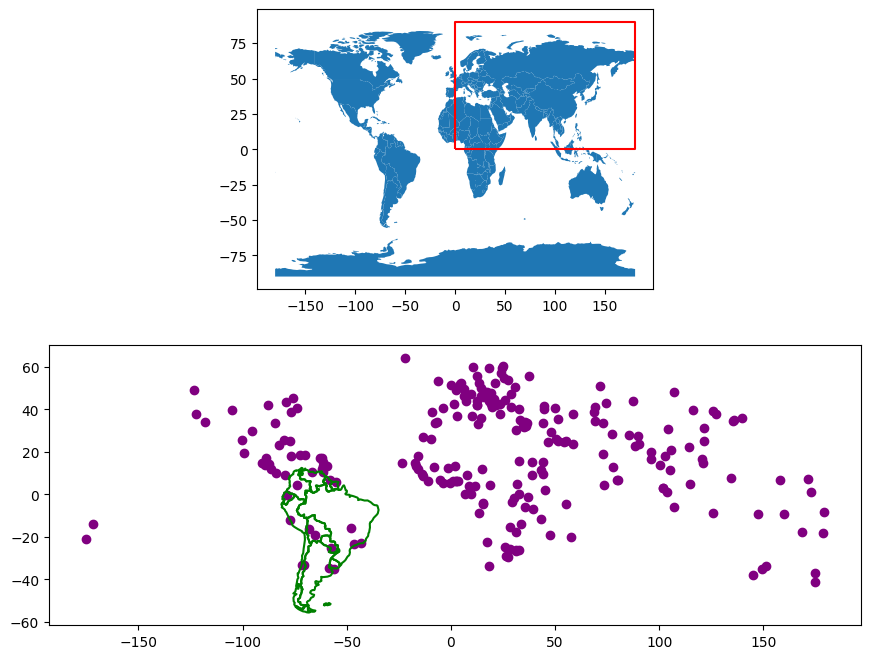

In [11]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1,color='red')
south_america.boundary.plot(ax=ax2,color='green')
capitals.plot(ax=ax2,color='purple')

## Clip the Data

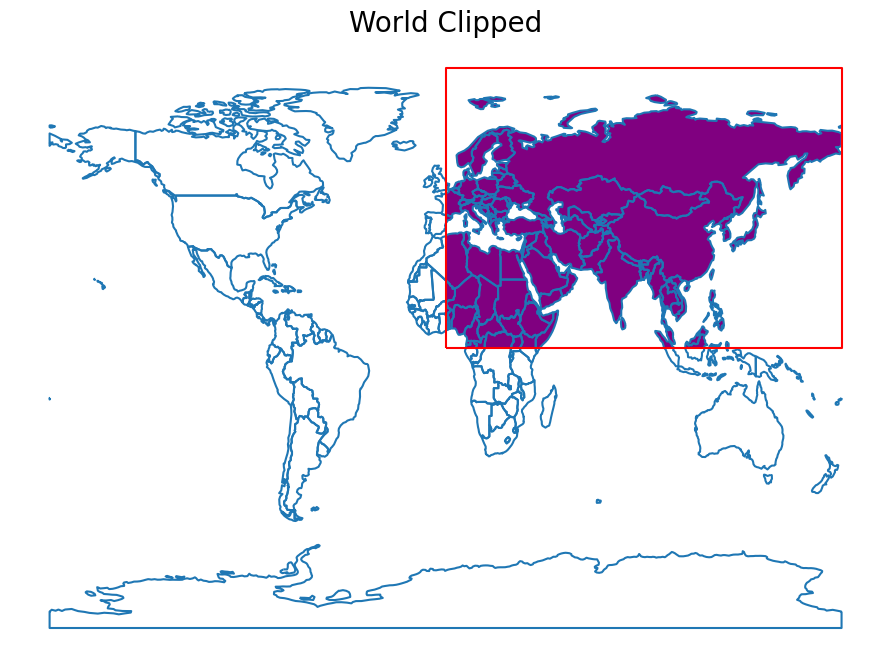

In [12]:
world_clipped = world.clip(polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

## Clip the Capitals Data

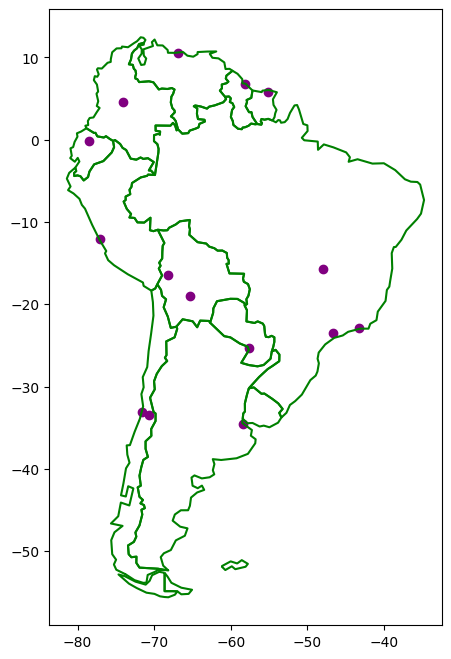

In [14]:
capitals_clipped = capitals.clip(south_america)

fig,ax = plt.subplots(figsize=(12, 8))
capitals_clipped.plot(ax=ax,color='purple')
south_america.boundary.plot(ax=ax,color='green')
plt.show()